In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
import pathlib

In [2]:
IMG_SHAPE=(150, 150, 3)

In [3]:
dataset_dir = pathlib.Path('../dataset')
dataset_test_dir = list(dataset_dir.glob('test/*'))

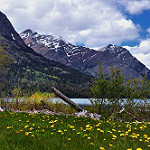

In [4]:
image_1 = str(dataset_test_dir[0])
img1 = Image.open(image_1)
img1

In [5]:
image_2 = str(dataset_test_dir[1])
img2 = Image.open(image_2)

In [6]:
interpreter = tf.lite.Interpreter(model_path='../TFLiteModel/model.tflite')
interpreter.allocate_tensors()

In [7]:
input_details = interpreter.get_input_details()
input_details

[{'name': 'input_2',
  'index': 0,
  'shape': array([  1, 150, 150,   3]),
  'shape_signature': array([ -1, 150, 150,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [8]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'Identity',
  'index': 628,
  'shape': array([1, 6]),
  'shape_signature': array([-1,  6]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [9]:
# [1 150 150 3]
input_shape = input_details[0]['shape']

input_data = tf.keras.utils.img_to_array(img1).reshape(1, 150, 150, 3)

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index']).reshape(6,)
print(output_data)

[-3.4061043 -2.3547044  1.7381943  3.9139159 -5.680917  -4.2523685]


In [10]:
# [1 150 150 3]
input_shape = input_details[0]['shape']

input_data = tf.keras.utils.img_to_array(img2).reshape(1, 150, 150, 3)

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index']).reshape(6,)
print(output_data)

[-5.1559258 -9.109982  -2.832273  -6.266967   9.52628   -9.43347  ]
